

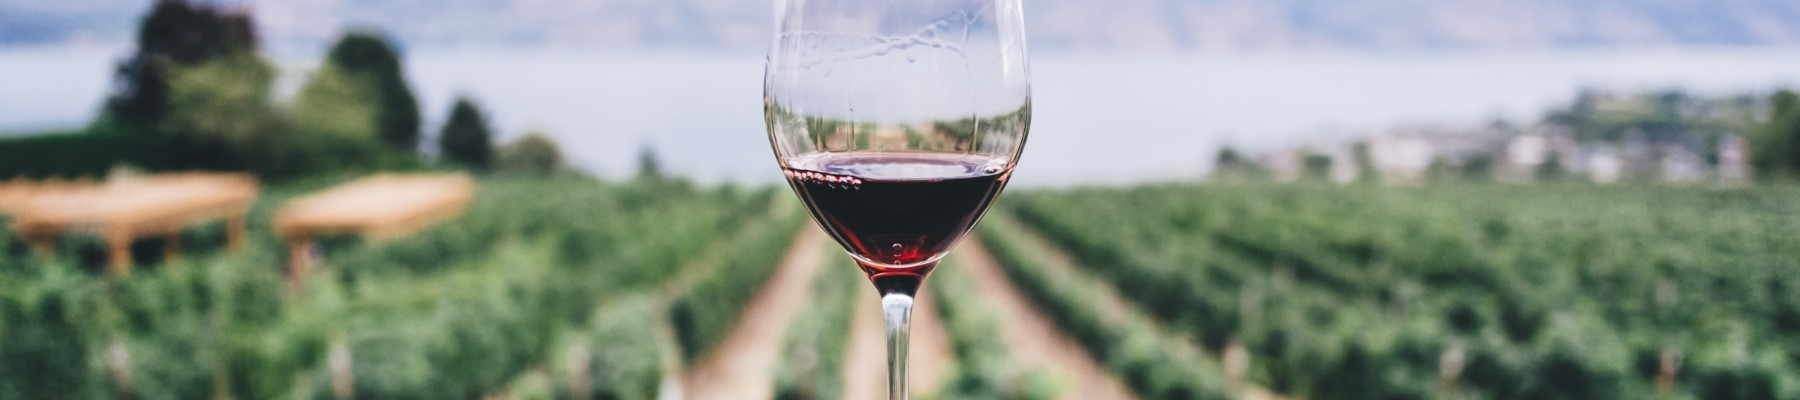

In this tutorial we are going to be working with Wine Quality Predictions and use correlation to pick out the features that we would use to train our model. We also visualise when exactly our model starts overfitting.

## Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')
#setting the default font values and figure size of all our charts
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (15, 10)

## Importing models & other classes

In [2]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

## Loading The Dataset

In [3]:
#Importing The Dataset
from sklearn.datasets import load_wine
#Loading the data into a dataframe
df = pd.DataFrame(load_wine().data, columns = load_wine().feature_names)
df['target'] = load_wine().target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Exploratory Data Analysis aka EDA

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [5]:
#finding out some stats about the independent variables
df[df.columns[:-1]].describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Using a regular loop we are trying to see what's the spread of our values look like.

In [6]:
for i in df[df.columns[:-1]]:
    fig = px.histogram(df[df.columns[:-1]][i], 
                       x=i, title=i.upper(),text_auto=True,
                       template='simple_white')
    fig.update_layout(bargap=0.2)
    fig.show()

Checking out the count values of our target values to see if the data is imbalanced or not. Since there is no huge difference, we could say the data is NOT imbalanced.

In [7]:
fig = px.histogram(df, 
             x="target", text_auto=True,
             color="target", 
             template='simple_white', 
             title = 'Target Values Countplot')

fig.update_layout(
xaxis_title="Target",yaxis_title=" Count")

fig.update_xaxes(ticktext=np.unique(df.target),tickvals=np.unique(df.target), ticklabelstep=1, 
                 type="category", categoryorder="total descending")

fig.show()

In [8]:
for i in df[df.columns]:
    fig = px.scatter(df[df.columns][i], 
                       x=i, color =df['target'], 
                     labels={'color': 'Target'}, title=i.upper(),
                       template='simple_white')
    
    fig.update_layout(yaxis_title=" ")
    fig.show()

## Feature Selection Techniques

### 1. Filter Methods

#### 1a. Coefficient Correlation

By using the correlation, we could choose the features that have a high correlation between them and pick out only those features.

Below is a heatmap that takes a look at the correlation values and filters any value that is less than 0.5. The features thus observed are used to a create a new dataframe and train our models on the new dataframe.

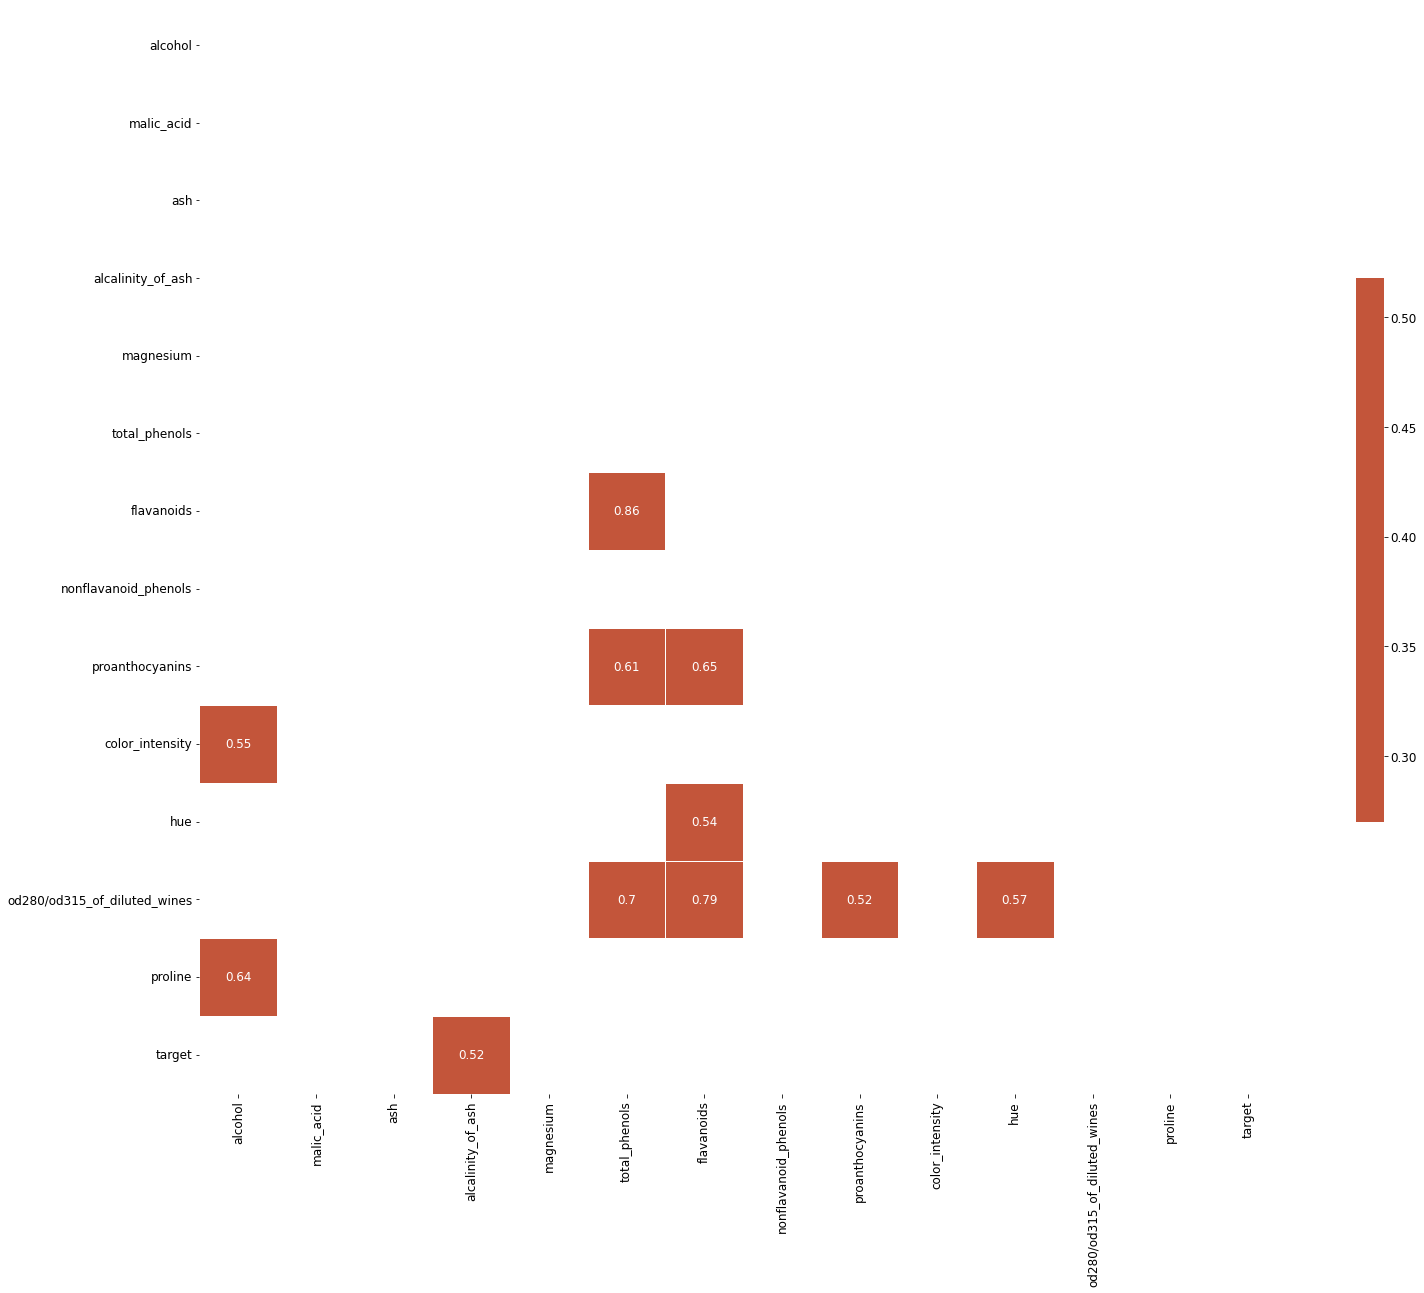

In [9]:
corr = df.corr()
corr = corr[corr > 0.5] #getting the values that have more correlation 
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(25,20))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.show()

Now that we know the features shown above have a high correlation, we can use these to build a new dataframe and use only those features to train our classification models.

In [10]:
df1 = df[['alcohol','flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']]
df1.head()

,alcohol,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.69,0.39,1.82,4.32,1.04,2.93,735.0


#### 1b. Chi-Square

A chi-square (χ2) statistic is a test that measures how a model compares to actual observed data. The data used in calculating a chi-square statistic must be random, raw, mutually exclusive, drawn from independent variables, and drawn from a large enough sample. For example, the results of tossing a fair coin meet these criteria.


- A chi-square (χ2) statistic is a measure of the difference between the observed and expected frequencies of the outcomes of a set of events or variables.
- Chi-square is useful for analyzing such differences in categorical variables, especially those nominal in nature.
- χ2 depends on the size of the difference between actual and observed values, the degrees of freedom, and the sample size.
- χ2 can be used to test whether two variables are related or independent from one another.
- It can also be used to test the goodness-of-fit between an observed distribution and a theoretical distribution of frequencies.

In [11]:
target = df['target'].values

In [12]:
chi_scores = chi2(df,target)
p_values =  pd.DataFrame()
p_values['Features'] = df.columns
p_values['p-values'] =  chi_scores[1]
p_values.sort_values(by = 'p-values' , ascending = True , inplace = True)
p_values.head(6).drop([13])

,Features,p-values
12,proline,0.000000e+00
9,color_intensity,2.124887e-24
6,flavanoids,1.766565e-14
4,magnesium,1.669728e-10
3,alcalinity_of_ash,4.163050e-07


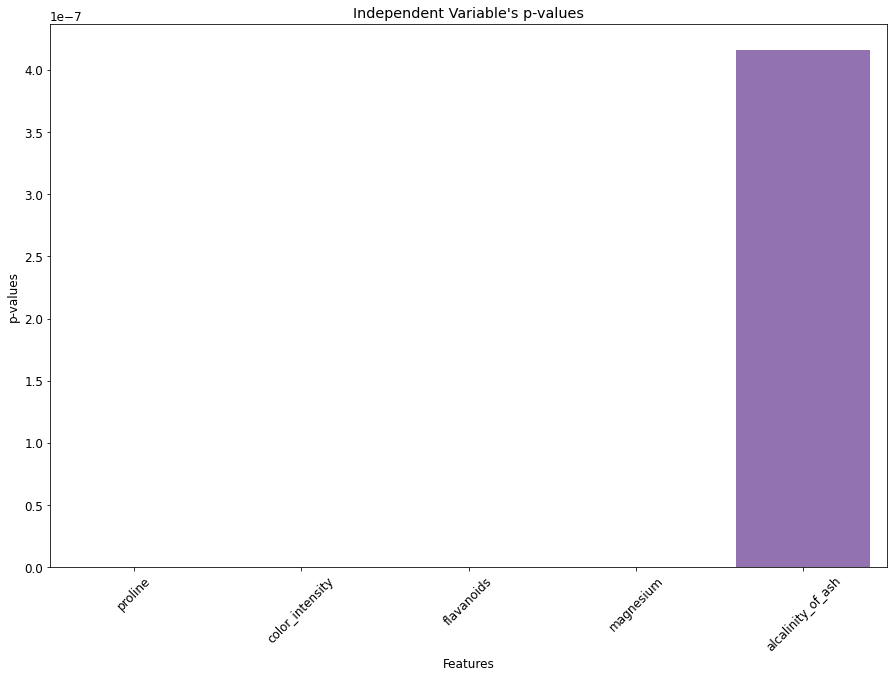

In [13]:
plt.xticks(rotation=45)
plt.title("Independent Variable's p-values")
sns.barplot(data=p_values.head(6).drop([13]), x='Features', y='p-values');

Since `alcalinity_of_ash` has the highest p-value, we can simply not take this feature and use the rest of the independent variables thus obtained by running a chi-square test.

#### 1c. ANOVA f-test Feature Selection

ANOVA is an acronym for “analysis of variance” and is a parametric statistical hypothesis test for determining whether the means from two or more samples of data (often three or more) come from the same distribution or not.

An F-statistic, or F-test, is a class of statistical tests that calculate the ratio between variances values, such as the variance from two different samples or the explained and unexplained variance by a statistical test, like ANOVA. The ANOVA method is a type of F-statistic referred to here as an ANOVA f-test.

Importantly, ANOVA is used when one variable is numeric and one is categorical, such as numerical input variables and a classification target variable in a classification task. The results of this test can be used for feature selection where those features that are independent of the target variable can be removed from the dataset.

In [14]:
X = df[df.columns[0:-1]]
y = df[df.columns[-1]]

In [15]:
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X, y)
X_train_fs = fs.transform(X)
X_test_fs = fs.transform(X)
for i in range(len(fs.scores_)):
    print('Feature %d, Score = %f' % (i, fs.scores_[i]))

Feature 0, Score = 135.077624
Feature 1, Score = 36.943425
Feature 2, Score = 13.312901
Feature 3, Score = 35.771637
Feature 4, Score = 12.429584
Feature 5, Score = 93.733010
Feature 6, Score = 233.925873
Feature 7, Score = 27.575417
Feature 8, Score = 30.271383
Feature 9, Score = 120.664018
Feature 10, Score = 101.316795
Feature 11, Score = 189.972321
Feature 12, Score = 207.920374


In [16]:
ANOVA_df =  pd.DataFrame()
ANOVA_df['Features'] = fs.feature_names_in_
ANOVA_df['Score'] =  fs.scores_
ANOVA_df.sort_values(by = 'Score' , ascending = True , inplace = True)
fig = px.histogram(ANOVA_df, 
                   x='Features', 
                   y='Score',
                   text_auto=True,
                   color='Features',
                   title='ANOVA Scores',
                   template='simple_white')
fig.update_layout(bargap=0.3)
fig.update_xaxes(categoryorder='total descending')
fig.show()

Based on the scores, we should be considering these features for the model building and training:-

1. flavanoids
2. od280/od315_of_diluted_wines
3. proline
4. color_intensity

## 2. Wrapper Methods

In wrapper methods, the feature selection process is based on a specific machine learning algorithm that we are trying to fit on a given dataset.

It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion. The evaluation criterion is simply the performance measure which depends on the type of problem, for e.g. For regression evaluation criterion can be p-values, R-squared, Adjusted R-squared, similarly for classification the evaluation criterion can be accuracy, precision, recall, f1-score, etc. Finally, it selects the combination of features that gives the optimal results for the specified machine learning algorithm.

![](https://editor.analyticsvidhya.com/uploads/46072IMAGE2.gif)

#### 2a. Recursive feature elimination (RFE)

RFE is a transformer estimator, which means it follows the familiar fit/transform pattern of Sklearn. It is a popular algorithm due to its easy configurable nature and robust performance. As the name suggests, it removes features one at a time based on the weights given by a model of our choice in each iteration.

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of **recursive feature elimination (RFE)** is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. 

That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [17]:
estimator = SVC(kernel="linear")
selector = RFE(estimator, n_features_to_select=6, step=1)
selector = selector.fit(df, target)
Ranking = pd.DataFrame(data= selector.feature_names_in_, columns=['Features'])
Ranking['Feature Selected'] = selector.support_
Ranking[Ranking['Feature Selected'].eq(True)]

,Features,Feature Selected
2,ash,True
6,flavanoids,True
7,nonflavanoid_phenols,True
10,hue,True
11,od280/od315_of_diluted_wines,True
13,target,True


Above are the features that have been selected using the RFE method of Feature selection.

**Choosing the number of features to keep automatically** 

The most important hyperparameters of RFE are estimator and n_features_to_select. In the last example, we chose few features and hoped for the best. However, as RFE can be wrapped around any model, we have to choose the number of relevant features based on their performance.

To achieve this, `sklearn` provides a similar RFECV class which implements Recursive Feature Elimination with cross-validation and automatically finds the optimal number of features to keep. 

Feel free to go ahead and click on the links given below in Further Reading section to learn more out `RFECV`.

#### 2b. Forward Selection

Forward feature selection starts with the evaluation of each individual feature, and selects that which results in the best performing selected algorithm model. What's the "best?" That depends entirely on the defined evaluation criteria (AUC, prediction accuracy, RMSE, etc.). Next, all possible combinations of the that selected feature and a subsequent feature are evaluated, and a second feature is selected, and so on, until the required predefined number of features is selected.

Step backward feature selection is closely related, and as you may have guessed starts with the entire set of features and works backward from there, removing features to find the optimal subset of a predefined size.

These are both potentially very computationally expensive. Do you have a large, multidimensional dataset? These methods may take too long to be at all useful, or may be totally infeasible. That said, with a dataset of accommodating size and dimensionality, such an approach may well be your best possible approach.

![](https://lh3.googleusercontent.com/Xo6LUQr0dwsBF3XurDUXewfNlETbYbRhJFQkxCwkuZdultoJtWA4p8DmSWV1HM4VdE_HhnjfB-hJ-2DhLzF26-6N17tNkAVtR9fxqSpCmywupctxud1cosqWHSjtrboO21gjgfCN=s0)

In [18]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
sfs1 = sfs(clf,k_features=5,forward=True,floating=False,verbose=0, scoring='accuracy',cv=5)
sfs1 = sfs1.fit(X, y)
print('Sequential Feature Selector CV Score -',sfs1.k_score_)

Sequential Feature Selector CV Score - 0.9833333333333332


In [19]:
feat_cols = list(sfs1.k_feature_names_[:-1])
print('The features that were selected while using Forward Selection are',feat_cols)

The features that were selected while using Forward Selection are ['alcohol', 'ash', 'magnesium', 'flavanoids']


Above are the independent features that were selected while using `Forward Selection` method of feature selection.

**Summary**:-
1. The filter methods and the wrapper can only be used for small to medium sized datasets as with larger datasets, the computational time and power will be more.
2. There is no best feature selection method. Just like there is no best set of input variables or best machine learning algorithm. At least not universally. Instead, you must discover what works best for your specific problem using careful systematic experimentation. 
3. Try a range of different models fit on different subsets of features chosen via different statistical measures and discover what works best for your specific problem.

**Further Reading:**

1. https://machinelearningmastery.com/overfitting-machine-learning-models/
2. https://machinelearningmastery.com/rfe-feature-selection-in-python/
3. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
4. https://machinelearningmastery.com/feature-selection-with-numerical-input-data/
5. https://rasbt.github.io/mlxtend/api_subpackages/mlxtend.feature_selection/

I hope this helped. Thanks for your time and going through the notebook.